<a href="https://colab.research.google.com/github/shreyasmiraj/computational_neuroscience_ODE/blob/main/Computational_Neuroscience_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Package/Library imports

In [ ]:
import math
import random
import numpy as np
import scipy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import plotly.express as px

#Helper functions

In [ ]:
def get_plot_grid(data_len, subplot_width=5, subplot_height=5):
  """Generates matplotlib figure with subplots in a square grid based on data len

  Parameters:
  -----------
    data_len : int
      length or number of subplots required
    subplot_width : float
      width of each subplot in inches
    subplot_height : float
      height of each subplot in inches

  Returns:
  --------
    fig, axes
  """
  subplot_width, subplot_height = (4,4)
  plot_grid = math.sqrt(data_len)
  n_rows = math.floor(plot_grid)
  n_columns = math.ceil(plot_grid)
  plt.rcParams.update({'figure.autolayout': True})
  fig, axs = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(subplot_width*n_columns, subplot_height*n_rows))
  if not isinstance(axs, np.ndarray):
    axs = np.array(axs)
  axs = axs.ravel()
  if data_len != n_rows*n_columns:
    for i in range(data_len,n_rows*n_columns):
      axs[i].set_axis_off()
  return fig, axs

#Funtion definition that computes and plots the evolution of x with respect to t through numerical/euler method

In [ ]:
def evolve_poly_x(n_dim, dx_coeffs, x_inits, t, dts=0.001, subplot_width=5, subplot_height=5, legend_loc='best', plot=True):
  """Calculates and plots the evolution of x with respect to t through numerical/euler method

  Parameters
  ----------
    n_dim : int
      Number of dimensions involved in the system
    dx_coeff : List(float), float, int
      Coefficients of the quadratic equation of the derivate dx
    x_init : List(float), float, int
      Initial conditions of x for simulation to start from
    t : float
      Total run duration for simulation
    df : List(float), float, int, optional
      Integration step durations to simulate. Default is 0.001.
    plot_width : int, float, optional
      Width of single subplot in inches. Default is 5 inches.
    plot_height : int, float, optional
      Height of single subplot in inches. Default is 5 inches.
    legend_loc : str, int, optional
      Location of the legend inside subplot, can be either str or the location code in int. Default is 'best'.

  Returns
  -------
    List of values of x computed at different timepoints given by t/dt
  """
  if isinstance(dx_coeffs, (int, float)):
    dx_coeff = [[dx_coeffs]]
  if isinstance(x_inits, (int, float)):
    x_inits = [[x_inits]]
  if isinstance(dts, (int, float)):
    dts = [dts]

  if len(dx_coeff) or len(x_inits) != n_dim:
    raise RuntimeError("Incompatible dimension and coefficients or initial conditions provided")

  #set plot parameters
  if plot:
    plot_grid = math.sqrt(len(dts))
    n_rows = math.floor(plot_grid)
    n_columns = math.ceil(plot_grid)
    plt.rcParams.update({'figure.autolayout': True})
    fig, axs = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(subplot_width*n_columns, subplot_height*n_rows))
    if not isinstance(axs, np.ndarray):
      axs = np.array(axs)
    axs = axs.ravel()
    if len(dts) != n_rows*n_columns:
      for i in range(len(dts),n_rows*n_columns):
        axs[i].set_axis_off()

  #compute values of x for given x_inits for t length with dt step size
  res = {}
  for i, dt in enumerate(dts):
    for x_init in tqdm(x_inits):
      timepoints = np.linspace(0,t,int(t/dt))
      x = np.zeros_like(timepoints)
      x[0] = x_init
      for ti in range(1,timepoints.shape[0]):
        dx_dt = 0
        power = len(dx_coeff)-1
        for coeff in dx_coeff:
          dx_dt += coeff*(x[ti-1]**power)
          power -= 1
        x[ti] = dx_dt*dt + x[ti-1]
      res['xinit:'+str(x_init)+'_'+'dt:'+str(dt)] = np.array([x,timepoints])
      if plot:
        axs[i].plot(timepoints, x)
    if plot:
      axs[i].set_xlabel("t")
      axs[i].set_ylabel("x")
      axs[i].legend(x_inits, loc=legend_loc)
      axs[i].set_title("dt = "+str(dt))
  if plot:
    fig.suptitle("Evolution of x with respect to t",fontsize=15)
    fig.tight_layout(rect=[0, 0, 0.9, 0.7])
  return res

#Spring equation

###Frictionless spring

In [ ]:
def spring_2d(t,z,k,m):
  x,v = z
  return v, -(k/m)*x

dt = 0.001
t = 5
z0 = [1,0.1]
k = 1
m = 1
t = np.linspace(0,5,int(t/dt))
sol = scipy.integrate.solve_ivp(spring_2d, t_span = [0.,5.], y0 = [2, 2], args=(k, m), dense_output=True, rtol=1e-5)
z = sol.sol(t)
plt.plot(t,z.T)
plt.show()

### Nonlinear spring

In [ ]:
def spring_nonlinear(t, z, k, m, mu):
  x, v = z
  return v, -k/m*x - mu*((x**2)-1)*v

Text(0.5, 0.98, 't vs x')

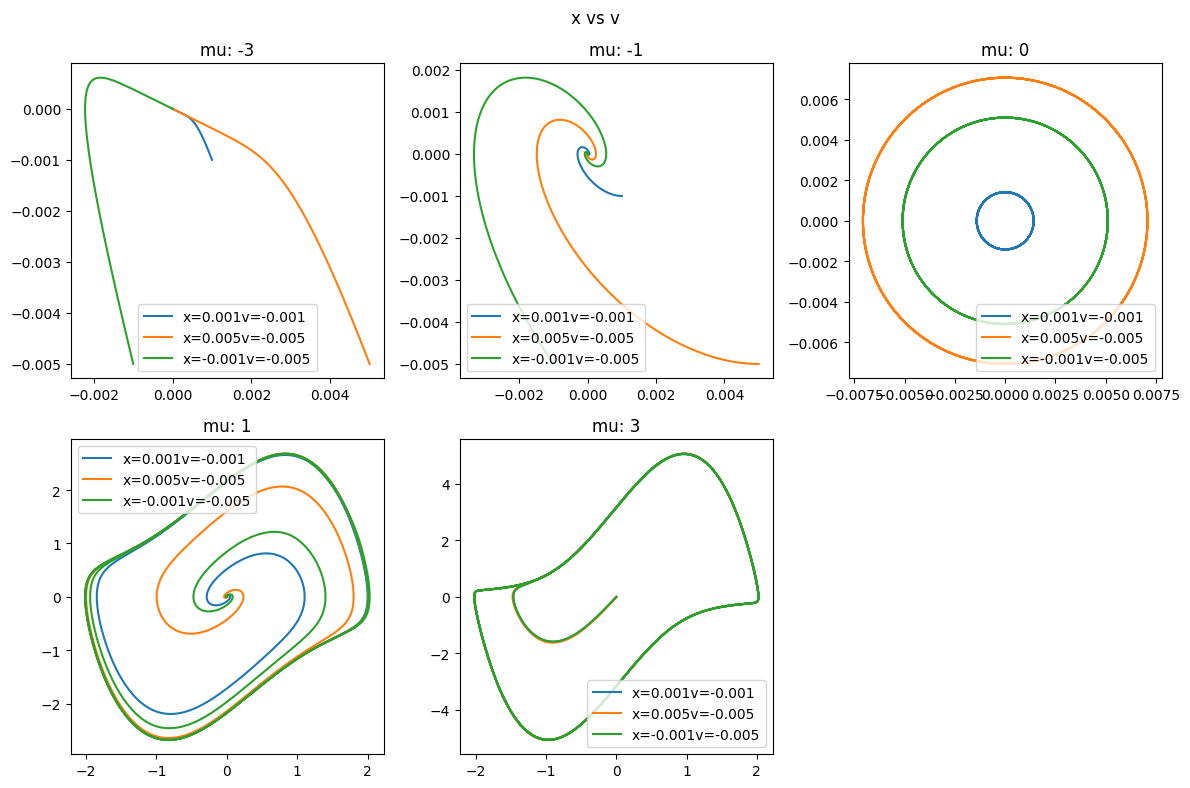

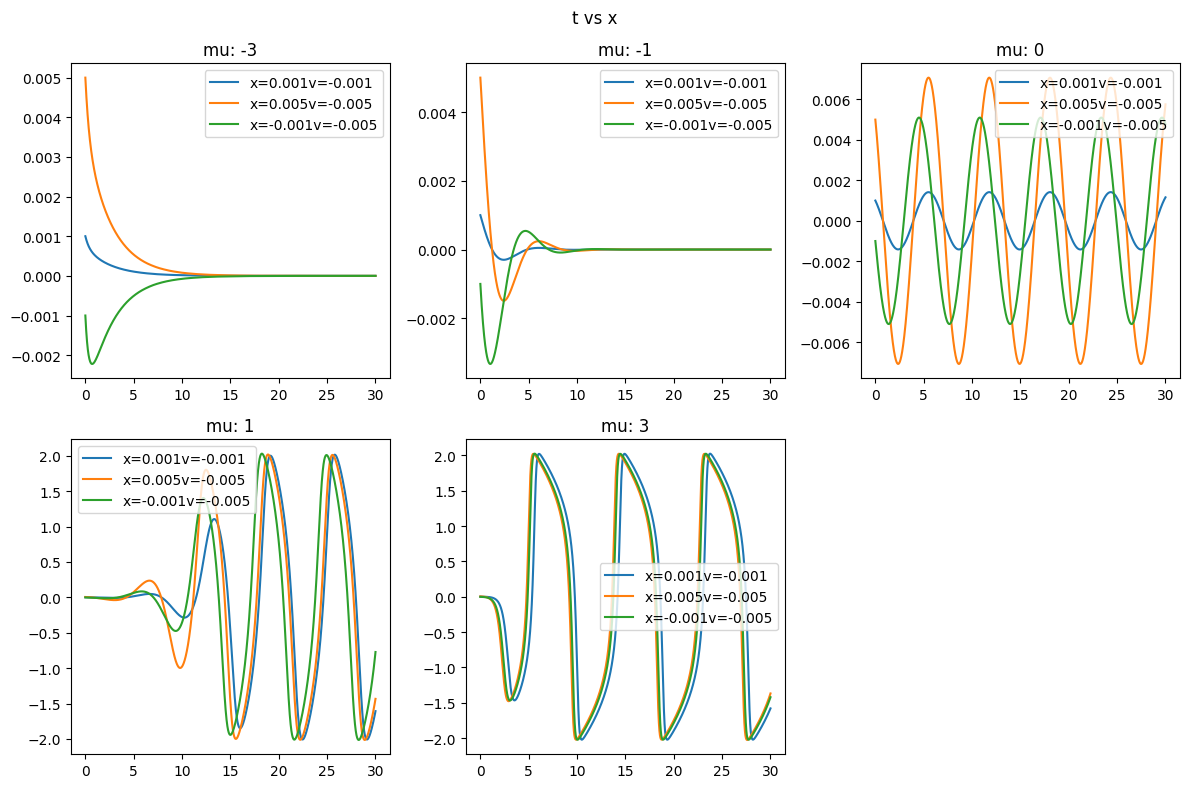

In [ ]:
dt = 0.001
t = 30
z0_inits = [[0.001,-0.001], [0.005,-0.005], [-0.001,-0.005]]
k = 1
m = 1
t_eval = np.linspace(0,t,int(t/dt))
mus = [-3, -1, 0, 1, 3]

#grid plot
subplot_width, subplot_height = (4,4)
plot_grid = math.sqrt(len(mus))
n_rows = math.floor(plot_grid)
n_columns = math.ceil(plot_grid)
plt.rcParams.update({'figure.autolayout': True})
fig, axs = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(subplot_width*n_columns, subplot_height*n_rows))
fig2, axs2 = plt.subplots(nrows=n_rows, ncols=n_columns, figsize=(subplot_width*n_columns, subplot_height*n_rows))
if not isinstance(axs, np.ndarray):
  axs = np.array(axs)
axs = axs.ravel()
if len(mus) != n_rows*n_columns:
  for i in range(len(mus),n_rows*n_columns):
    axs[i].set_axis_off()
if not isinstance(axs2, np.ndarray):
  axs2 = np.array(axs2)
axs2 = axs2.ravel()
if len(mus) != n_rows*n_columns:
  for i in range(len(mus),n_rows*n_columns):
    axs2[i].set_axis_off()

for i, mu in enumerate(mus):
  for z0 in z0_inits:
    sol = scipy.integrate.solve_ivp(spring_nonlinear, t_span = [t_eval[0], t_eval[-1]], y0 = z0, t_eval=t_eval, args=(k, m, mu))
    axs[i].plot(sol.y[0], sol.y[1], label='x='+str(z0[0])+'v='+str(z0[1]))
    axs2[i].plot(sol.t, sol.y[0], label='x='+str(z0[0])+'v='+str(z0[1]))
  axs[i].legend()
  axs2[i].legend()
  axs[i].set_title('mu: '+str(mu))
  axs2[i].set_title('mu: '+str(mu))
fig.suptitle('x vs v')
fig2.suptitle('t vs x')

#Exponential population growth and saturation:   $dN = rN(1-\frac{N}{k})$

  0%|          | 0/3 [00:00<?, ?it/s]

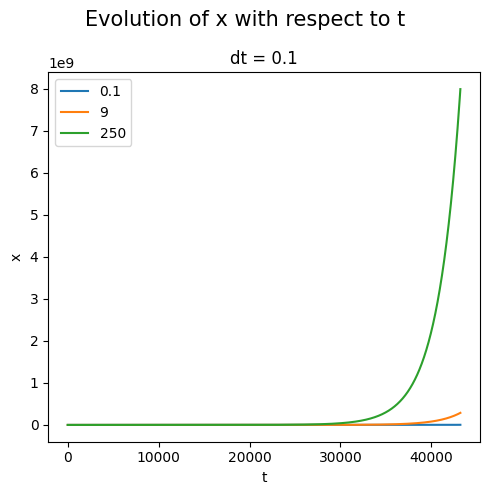

In [ ]:
r = 1/2500
k = 250
_ = evolve_poly_x(dx_coeff=[r, 0], x_inits=[0.1, 9, 250], t=12*3600, dts=0.1)

  0%|          | 0/3 [00:00<?, ?it/s]

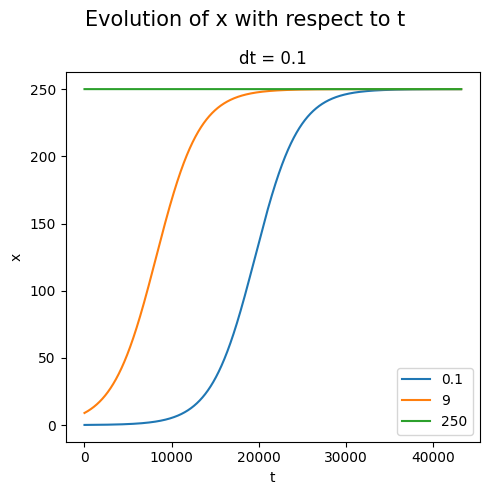

In [ ]:
r = 1/2500
k = 250
_ = evolve_quad_x(dx_coeff=[-r/k, r, 0], x_inits=[0.1, 9, 250], t=12*3600, dts=0.1)

#Example Simulation for the equation:  $\frac{dx}{dt} = -x^3 + x$

$x_t = dx + x_{t-1}$

$x_t = (-(x_{t-1})^3 + x_{t-1})dt + x_{t-1}$

Change the values presents in
  
  dx_coeff -  represents coeffecients of the quadratic equation of the derivative function above:
  
  $[-1*x^3, 0*x^2, 1*x^1, 0*x^0]$ <==> [ -1 , 0 , 1 , 0 ]
    
  
  
  x_inits - that specifies the set of inital conditions to run the simulation/integration from
  
  t - that specifies the duration to run the simulation for
  
  dt - that specifies the set of integration step sizes to be used for simulation

  For multiple values of x_init and dt ensure that the values inside x_inits and dts are seperated by ',' and are bounded by [ ] brackets

Experiment with different values and try to infer why do the plots behave the way they do for the set of initial conditions/time/timesteps that you chose

Example:
  
  ```python
  evolve_x(dx_coeff=[-1,0,1,0], x_inits=[-0.1,0.1,1.1,-1.1,0,1,-1], t=10, dts=[0.00001,0.01,0.5,0.8,0.85])

  evolve_x(dx_coeff=[-1,0,1,0], x_inits=[-5,5], t=15, dts=[0.1])

  evolve_x(dx_coeff=[-1,0,1,0], x_inits=[-0.1,1,-1,0.1], t=3, dts=[0.001])

  evolve_x(dx_coeff=[-1,0,1,0], x_inits=[-0.1,1,-1,0.1], t=3, dts=[0.001])
  ```

  #### Note: the smaller the values of dt chosen, the longer it takes for the values to be computed

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

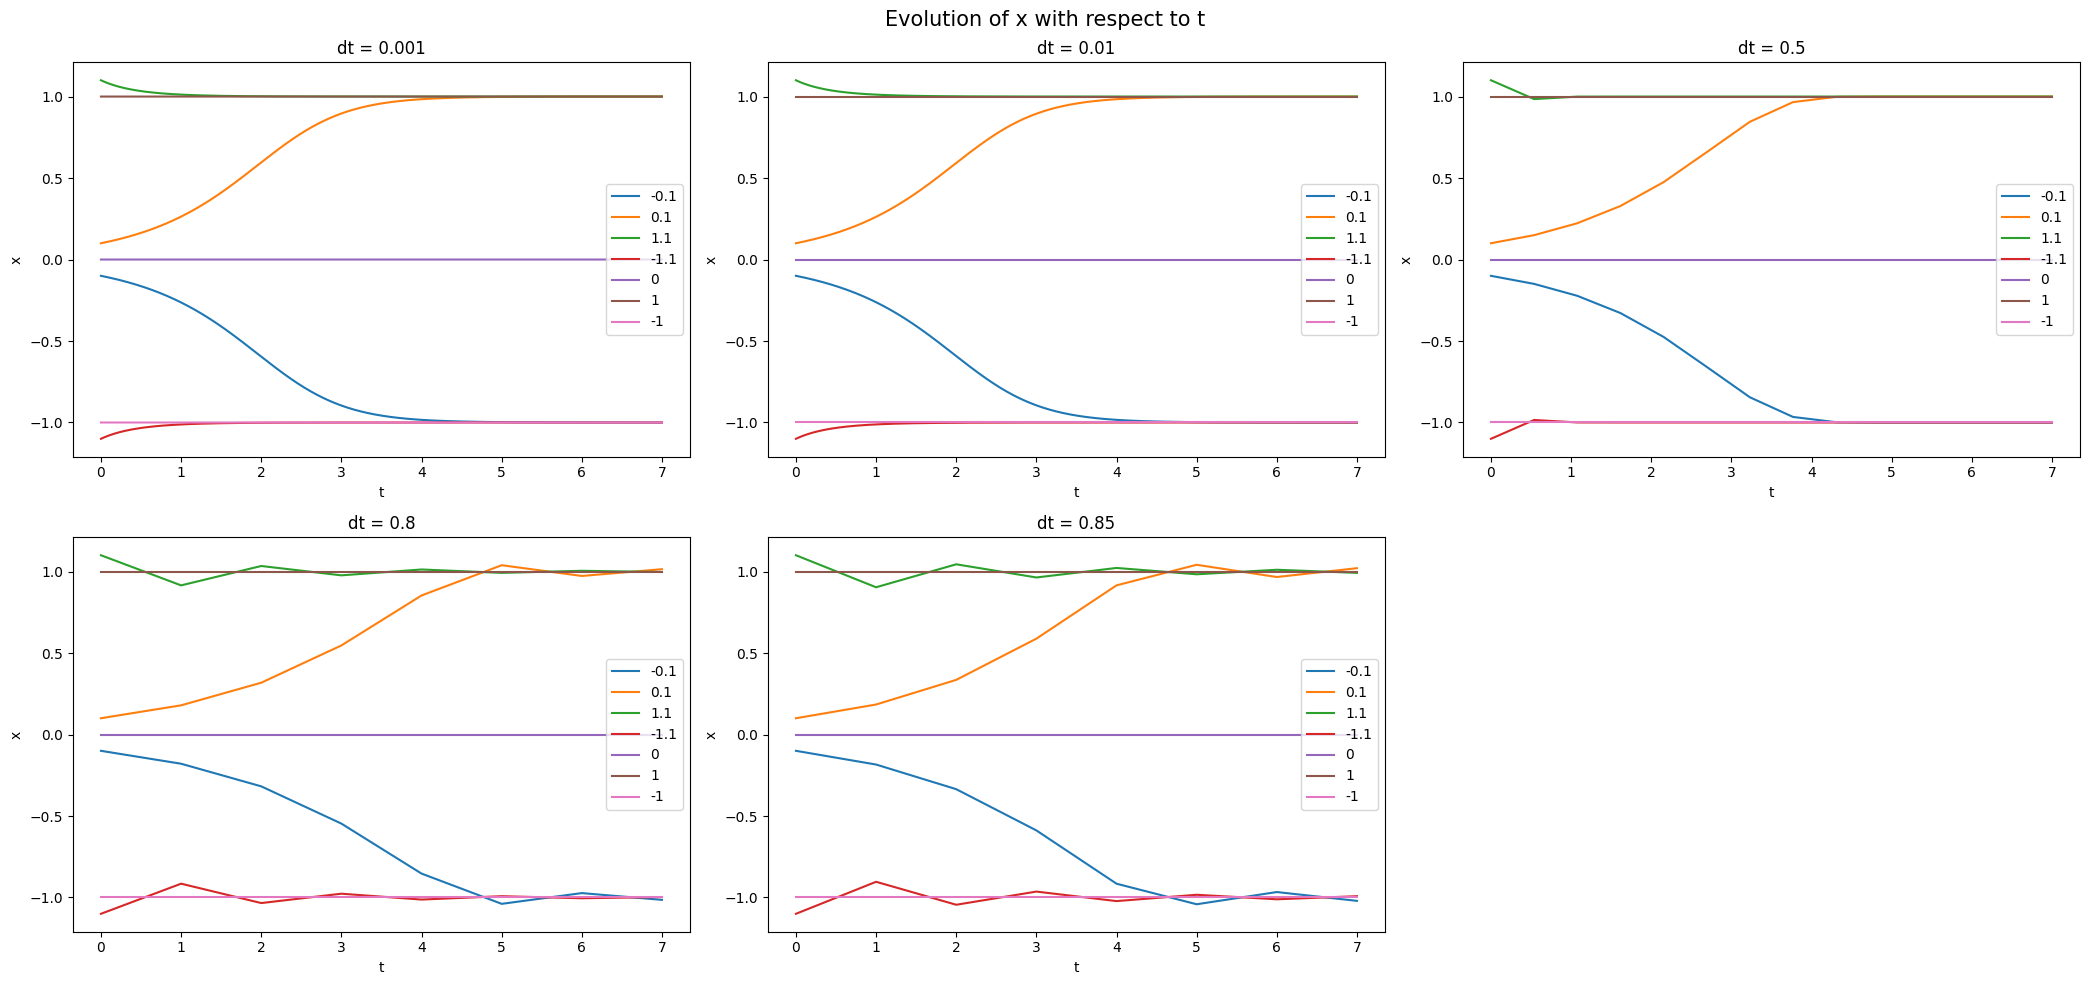

In [ ]:
_ = evolve_poly_x(dx_coeff=[-1,0,1,0], x_inits=[-0.1,0.1,1.1,-1.1,0,1,-1], t=7, dts=[0.001,0.01,0.5,0.8,0.85], subplot_width=7, subplot_height=5, legend_loc='center right')

# Neuron with only Na channel

###integration using solvers

In [ ]:
g_l = 19
g_Na = 74

E_l = -67
E_Na = 60
v_h = 1.5

k = 16
C = 0.01
I = 0


dt = 0.0001
v = np.linspace(-100, 100, int(100/dt))
tspan = np.linspace(0, 100, int(100/dt))
# v = np.linspace(-100, 100, int(100/0.0001)) #mv

def m_inf(v_h, v, k):
  return 1/(1+np.exp((v_h-v)/k))

def potential_rate_change(t, y, g_l, g_Na, E_l, v_h, k, C, I, dt):
  v = y[0]
  dv = ((-g_l * (v - E_l)) - (g_Na * m_inf(v_h, v, k) * (v - E_Na)) + I)/C
  return [v+dv*dt, dv]

sol = scipy.integrate.solve_ivp(potential_rate_change, t_span=[tspan[0],tspan[-1]], y0=[-80,0], args=(g_l, g_Na, E_l, v_h, k, C, I, dt), t_eval=tspan, dense_output=False, rtol=1e-5)


# v_dot = sol.sol(t)

###Phase space

In [ ]:
# def m_inf(v_h, v, k):
#   return

#Conductance values
g_l = 19
g_Na = 74

#equilibrium values
E_l = -67
E_Na = 60
v_h = 1.5

#capacitance, Na opening rate
k = 16
C = 0.01
I = 0

random.seed(42) #for replication

dt = 0.0001
v_span = np.linspace(-100, 100, int(100/dt))
t_span = np.linspace(0, 100, int(100/dt))
I_span = np.linspace(-1000, 200, int(1200))
v_dot = []
v = []
v_inv = []
v_inits = random.choices(v_span, k=len(I_span))
stable_points = []
unstable_points = []
for i,I in (enumerate(I_span)):
  v.append(v_inits[i])
  v_inv.append(v_inits[i])
  for t in range(10000):
    dv = ((-g_l * (v[-1] - E_l)) - (g_Na * (1/(1+np.exp((v_h-v[-1])/k))) * (v[-1] - E_Na)) + I)/C
    dv_inv = ((-g_l * (v_inv[-1] - E_l)) - (g_Na * (1/(1+np.exp((v_h-v_inv[-1])/k))) * (v_inv[-1] - E_Na)) + I)/C
    v.append(v[-1]+dv*dt)
    v_inv.append(v_inv[-1]-dv_inv*dt)
    v_dot.append(dv)
    # if v_dot[-1] == 0 and not v[-1] in stable_points:
    #   if (v[-1] < 0 and v[-2] > 0) or (v[-1] > 0 and v[-2] < 0):
    #     stable_points.append(v[-1])
  stable_points.append(v[-1])
  unstable_points.append(v_inv[-1])

<ipython-input-2-947ac09530a1>:35: RuntimeWarning: overflow encountered in scalar divide
  dv_inv = ((-g_l * (v_inv[-1] - E_l)) - (g_Na * (1/(1+np.exp((v_h-v_inv[-1])/k))) * (v_inv[-1] - E_Na)) + I)/C
<ipython-input-2-947ac09530a1>:35: RuntimeWarning: overflow encountered in exp
  dv_inv = ((-g_l * (v_inv[-1] - E_l)) - (g_Na * (1/(1+np.exp((v_h-v_inv[-1])/k))) * (v_inv[-1] - E_Na)) + I)/C
<ipython-input-2-947ac09530a1>:35: RuntimeWarning: invalid value encountered in scalar multiply
  dv_inv = ((-g_l * (v_inv[-1] - E_l)) - (g_Na * (1/(1+np.exp((v_h-v_inv[-1])/k))) * (v_inv[-1] - E_Na)) + I)/C


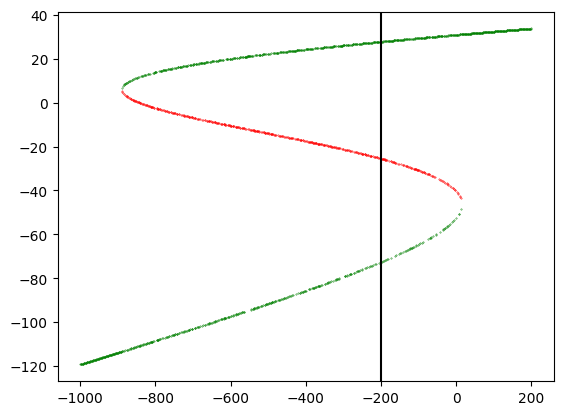

In [ ]:
plt.scatter(I_span, unstable_points, color='r', alpha=1, s=0.1)
plt.scatter(I_span, stable_points, color='g', alpha=1, s=0.1)
# plt.scatter(I_span[802], stable_points[1090], s=5, color='k')
plt.axvline(x=-200, color='k', linestyle='-')

Text(0.5, 1.0, 'phase space')

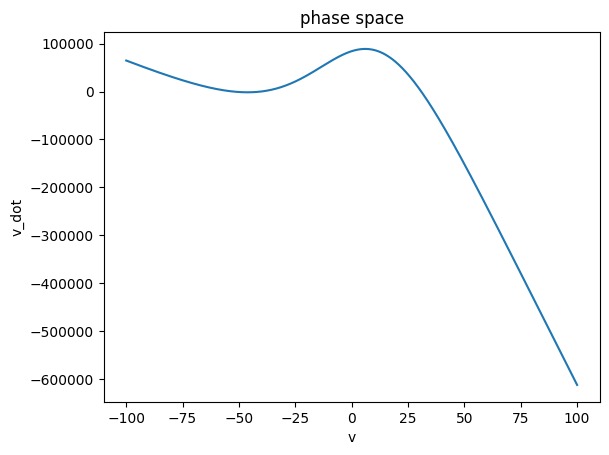

In [ ]:
plt.plot(v_span, v_dot)
plt.xlabel('v')
plt.ylabel('v_dot')
plt.title('phase space')

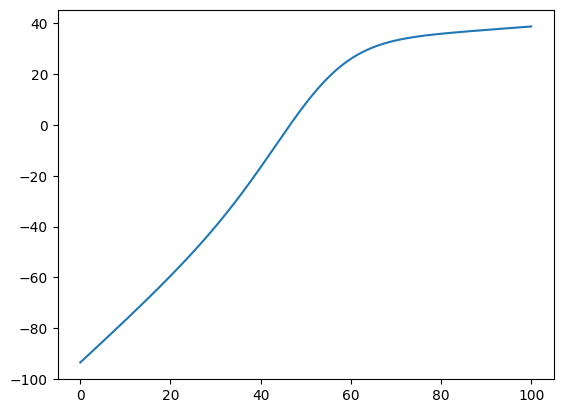

In [ ]:
plt.plot(t_span)

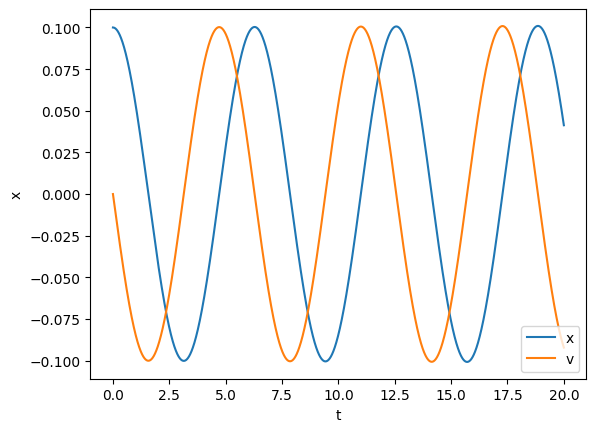

In [ ]:
dt = 0.001
t = 20
timepoints = np.linspace(0,t,int(t/dt))
x = np.zeros_like(timepoints)
v = np.zeros_like(timepoints)
k = 1
m = 1
x[0] = 0.1
v[0] = 0

for ti in range(1,timepoints.shape[0]):
  x[ti] = (v[ti-1]) * dt + x[ti-1]
  v[ti] = ((-k/m)*x[ti-1]) * dt + v[ti-1]

plt.plot(timepoints, x)
plt.plot(timepoints, v)
plt.legend(['x','v'])
plt.xlabel('t')
plt.ylabel('x')
plt.show()